In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
import numpy as np

In [174]:
input_sequences = []
for sentence in training_text.split('\n'):
    tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(tokenized_sentence)):
        input_sequences.append(tokenized_sentence[:i+1])

In [212]:
max_len = max([len(x) for x in input_sequences])
padded_input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')
X_train = padded_input_sequences[:, :-1]
y_train = padded_input_sequences[:, -1]
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(tokenizer.word_index) + 1)

{'the': 1, 'of': 2, 'and': 3, 'his': 4, 'a': 5, 'i': 6, 'to': 7, 'in': 8, 'was': 9, 'he': 10, 'with': 11, 'that': 12, 'my': 13, 'you': 14, 'own': 15, 'which': 16, 'had': 17, 'adventure': 18, 'have': 19, 'it': 20, 'for': 21, 'but': 22, 'as': 23, 'me': 24, 'from': 25, 'up': 26, 'case': 27, 'chapter': 28, 'holmes': 29, 'not': 30, 'all': 31, 'one': 32, 'were': 33, 'woman': 34, 'him': 35, 'upon': 36, 'more': 37, 'little': 38, 'who': 39, 'been': 40, 'see': 41, 'again': 42, 'know': 43, 'how': 44, 'scandal': 45, 'bohemia': 46, 'man': 47, 'she': 48, 'always': 49, 'seldom': 50, 'heard': 51, 'her': 52, 'any': 53, 'other': 54, 'whole': 55, 'emotion': 56, 'irene': 57, 'adler': 58, 'mind': 59, 'most': 60, 'seen': 61, 'would': 62, 'himself': 63, 'such': 64, 'into': 65, 'be': 66, 'nature': 67, 'lately': 68, 'every': 69, 'baker': 70, 'street': 71, 'week': 72, 'drug': 73, 'keen': 74, 'by': 75, 'study': 76, 'extraordinary': 77, 'powers': 78, 'out': 79, 'those': 80, 'clearing': 81, 'time': 82, 'some': 83,

In [214]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_shape=(max_len-1,)))
model.add(LSTM(units=150))
model.add(Dense(units=len(tokenizer.word_index)+1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

[[5, 45],
 [5, 45, 8],
 [5, 45, 8, 46],
 [1, 98],
 [1, 98, 99],
 [1, 98, 99, 100],
 [5, 27],
 [5, 27, 2],
 [5, 27, 2, 101],
 [1, 102],
 [1, 102, 103],
 [1, 102, 103, 104],
 [1, 105],
 [1, 105, 106],
 [1, 105, 106, 107],
 [1, 47],
 [1, 47, 11],
 [1, 47, 11, 1],
 [1, 47, 11, 1, 108],
 [1, 47, 11, 1, 108, 109],
 [1, 18],
 [1, 18, 2],
 [1, 18, 2, 1],
 [1, 18, 2, 1, 110],
 [1, 18, 2, 1, 110, 111],
 [1, 18],
 [1, 18, 2],
 [1, 18, 2, 1],
 [1, 18, 2, 1, 112],
 [1, 18, 2, 1, 112, 113],
 [1, 18],
 [1, 18, 2],
 [1, 18, 2, 1],
 [1, 18, 2, 1, 114],
 [1, 18, 2, 1, 114, 115],
 [1, 18],
 [1, 18, 2],
 [1, 18, 2, 1],
 [1, 18, 2, 1, 116],
 [1, 18, 2, 1, 116, 117],
 [1, 18],
 [1, 18, 2],
 [1, 18, 2, 1],
 [1, 18, 2, 1, 118],
 [1, 18, 2, 1, 118, 119],
 [1, 18],
 [1, 18, 2],
 [1, 18, 2, 1],
 [1, 18, 2, 1, 120],
 [1, 18, 2, 1, 120, 121],
 [5, 45],
 [5, 45, 8],
 [5, 45, 8, 46],
 [122, 2],
 [122, 2, 123],
 [28, 124],
 [28, 125],
 [28, 126],
 [28, 6],
 [7, 127],
 [7, 127, 29],
 [7, 127, 29, 48],
 [7, 127, 29, 48

In [220]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

15
[[  0   0   0 ...   0   5  45]
 [  0   0   0 ...   5  45   8]
 [  0   0   0 ...  45   8  46]
 ...
 [  0   0   0 ...  60 411   3]
 [  0   0   0 ...   0 412 413]
 [  0   0   0 ... 412 413 414]]
(770, 14)
(770,)


In [221]:
model.save("trained_model.keras")

(770, 415)


In [194]:
# Plot the training loss and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
plt.show()

In [195]:
with open("test_data.txt", "r") as file:
    test_text = file.read()

In [196]:
test_sequences = tokenizer.texts_to_sequences([test_text])
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='pre')
X_test = padded_test_sequences[:, :-1]
y_test = padded_test_sequences[:, -1]
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(tokenizer.word_index) + 1)

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)        │ (None, 15, 100)        │        41,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 150)            │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 415)            │        62,665 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 254,765 (995.18 KB)

 Trainable params: 254,765 (995.18 KB)

 Non-trainable params: 0 (0.00 B)

In [198]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Print model summary
model.summary()

(770, 14)
(770, 415)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.0224 - loss: 5.9624
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0627 - loss: 5.3868
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0442 - loss: 5.2996
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0418 - loss: 5.1982
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0506 - loss: 5.2259
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0466 - loss: 5.2432
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0685 - loss: 5.2157
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0648 - loss: 5.1142
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0671 - loss: 5.0094
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0581 - loss: 4.8568
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0839 - loss: 4.6786
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

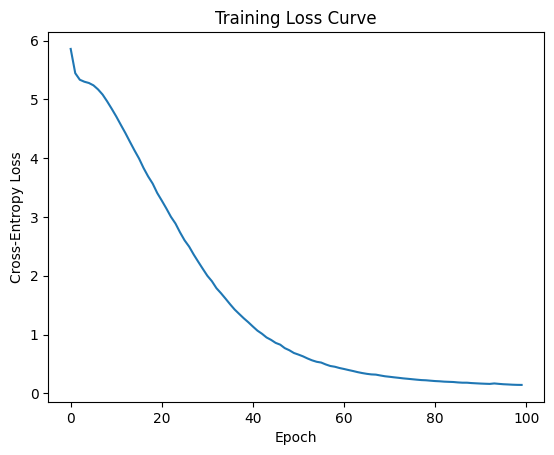

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.0000e+00 - loss: 6.1010
Test Loss: 6.101014137268066
Test Accuracy: 0.0


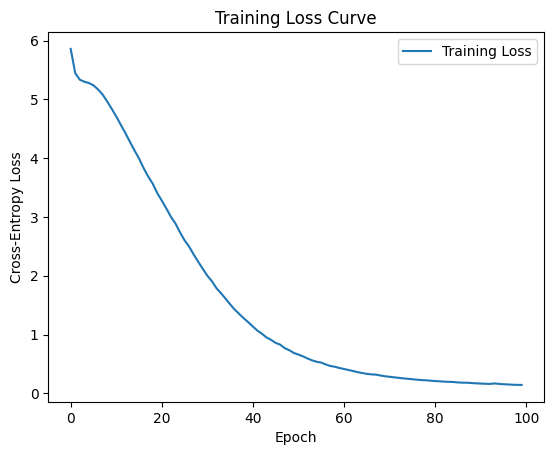

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)        │ (None, 15, 100)        │        41,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 150)            │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 415)            │        62,665 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 764,297 (2.92 MB)

 Trainable params: 254,765 (995.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 509,532 (1.94 MB)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [163]:
# for i in range(1):
#   print(test_text,"\n")
#   test_sequence = tokenizer.texts_to_sequences([test_text])[0]
#   padded_test_sequence = pad_sequences([test_sequence], maxlen=max_len, padding='pre')
#   pos= np.argmax(loaded_model.predict(padded_test_sequence))
#   for word,index in tokenizer.word_index.items():
#       if index == pos:
#         test_text = test_text + " " + word
#         print(test_text)
      

my name is
my name and
my name in
my name the
my name of
 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
my name is
my name and
my name in
my name the
my name of
 the


In [152]:
# predicted_index = np.argmax(predicted_probabilities, axis=-1).numpy()[0]
# # Map the index back to the word using the tokenizer
# predicted_word = tokenizer.index_word[predicted_index]

# # Display the predicted word
# print("Predicted Next Word:", predicted_word)